<a href="https://colab.research.google.com/github/ariscandra/MP1_AVD/blob/main/MP1_AVD_ArisCandraMuzaffar_2409116088.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset yang digunakan pada studi kasus: https://www.kaggle.com/datasets/anthonytherrien/website-traffic/data

# **BUSINESS UNDERSTANDING**

### Business Objective

Tujuan utama dari proyek ini adalah untuk menganalisis efektivitas berbagai sumber lalu lintas (*traffic source*) terhadap kinerja situs web guna meningkatkan strategi pemasaran digital. Analisis ini bertujuan untuk memahami bagaimana lalu lintas dari sumber berbeda (Organic,  dalam artian, melalui pencarian *search engine*, media sosial, berbayar/iklan, dll.) mempengaruhi metrik utama seperti *bounce rate, session duration*, dan *conversion rate*. Dengan pemahaman ini, strategi pemasaran dapat dioptimalkan untuk meningkatkan efisiensi pengeluaran iklan serta meningkatkan konversi dan *users engagement*.

### Assess Situation

Persaingan dalam pemasaran digital semakin ketat, dan perusahaan perlu memahami dari mana lalu lintas terbaik berasal untuk mengalokasikan sumber daya dengan lebih efektif. Perubahan algoritma *search engine*, tren media sosial, serta kebijakan iklan digital dapat berdampak signifikan pada efektivitas *traffic*. Oleh karena itu, analisis mendalam diperlukan untuk mengidentifikasi sumber *traffic* yang paling menguntungkan serta strategi yang dapat diterapkan guna meningkatkan *users engagement* dan tingkat konversi.

### Data Mining Goals

Studi ini bertujuan untuk mengidentifikasi sumber *traffic* yang menghasilkan tingkat *users engagement* tertinggi (*session duration* dan *time on page*). Menganalisis hubungan antara sumber *traffic* dan tingkat konversi guna menentukan saluran *marketing* yang paling efektif. Memahami faktor-faktor yang menyebabkan *bounce rate* tinggi dari sumber tertentu. Memberikan rekomendasi berbasis data terkait pengalokasian anggaran digital *marketing* untuk meningkatkan efektivitas strategi pemasaran.

### Project Plan

1. **Pengumpulan Data**: Menggunakan dataset yang mencakup metrik seperti *traffic source, session duration, bounce rate*, dan *conversion rate*.
2. **Pembersihan Data**: Mengidentifikasi dan menangani data yang hilang atau tidak valid/keliru.
3. **Eksplorasi Data**: Visualisasi data untuk memahami pola keterlibatan pengguna dari masing-masing *traffic source*.
4. **Analisis Deskriptif & Prediktif**: Menggunakan analisis deskriptif dan prediktif untuk mengidentifikasi hubungan antara *traffic source* dan metrik kinerja situs web.
5. **Pembuatan Rekomendasi**: Menyusun strategi berbasis data untuk meningkatkan efektivitas *traffic source* dalam meningkatkan konversi.
6. **Evaluasi & Implementasi**: Menguji hasil rekomendasi dengan strategi pemasaran yang dioptimalkan dan memantau dampaknya terhadap kinerja situs web.

### Deskripsi Dataset

- **Page Views**: Jumlah halaman yang dikunjungi dalam satu sesi.  
- **Session Duration**: Total waktu yang dihabiskan pengguna selama sesi berlangsung (dalam menit).  
- **Bounce Rate**: Persentase pengunjung yang langsung keluar dari situs setelah hanya membuka satu halaman.  
- **Traffic Source**: Sumber kedatangan pengunjung, seperti pencarian organik lewat *search engine*, media sosial, atau iklan berbayar.  
- **Time on Page**: Berapa lama pengguna mengakses suatu halaman sebelum berpindah atau meninggalkan situs.  
- **Previous Visits**: Jumlah kunjungan yang pernah dilakukan sebelumnya oleh pengunjung yang sama.  
- **Conversion Rate**: Persentase pengunjung yang melakukan tindakan yang diinginkan, seperti membeli produk atau mendaftar layanan.  

###Pemeriksaan Struktur Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/Praktikum/Mini-Project 1/website_wata.csv")

In [2]:
df.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [3]:
# Mengecek struktur data frame (tipe data pada setiap kolom, jumlah baris dan kolom yang terdapat pada dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


### Implementasi Statistik Deskriptif & Analisis Korelasi

In [4]:
# Menampilkan statistik ringkasan seperti mean, median, min, max, dan kuartil
df.describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


In [5]:
# Menghitung jumlah kemunculan nilai unik dalam kolom tertentu
df['Previous Visits'].value_counts()

,count
Previous Visits,
2,563
1,539
3,341
0,282
4,160
5,78
6,24
7,10
8,2


In [6]:
print("Menghitung rata-rata:")
print(df.mean(numeric_only=True))

Menghitung rata-rata:
Page Views          4.950500
Session Duration    3.022045
Bounce Rate         0.284767
Time on Page        4.027439
Previous Visits     1.978500
Conversion Rate     0.982065
dtype: float64


In [7]:
print("Menghitung median:")
print(df.median(numeric_only=True))

Menghitung median:
Page Views          5.000000
Session Duration    1.993983
Bounce Rate         0.266375
Time on Page        3.315316
Previous Visits     2.000000
Conversion Rate     1.000000
dtype: float64


In [8]:
print("Menghitung standar deviasi:")
print(df.std(numeric_only=True))

Menghitung standar deviasi:
Page Views          2.183903
Session Duration    3.104518
Bounce Rate         0.159781
Time on Page        2.887422
Previous Visits     1.432852
Conversion Rate     0.065680
dtype: float64


In [9]:
print("Mencari korelasi antar kolom numerik:")
print(df.corr(numeric_only=True))

Mencari korelasi antar kolom numerik:
                  Page Views  Session Duration  Bounce Rate  Time on Page  \
Page Views          1.000000         -0.012788     0.030223      0.023941   
Session Duration   -0.012788          1.000000    -0.015931     -0.013985   
Bounce Rate         0.030223         -0.015931     1.000000      0.039340   
Time on Page        0.023941         -0.013985     0.039340      1.000000   
Previous Visits     0.028595         -0.025534    -0.015860     -0.028729   
Conversion Rate     0.126635          0.177798    -0.049051      0.229669   

                  Previous Visits  Conversion Rate  
Page Views               0.028595         0.126635  
Session Duration        -0.025534         0.177798  
Bounce Rate             -0.015860        -0.049051  
Time on Page            -0.028729         0.229669  
Previous Visits          1.000000         0.109496  
Conversion Rate          0.109496         1.000000  


**INSIGHTS:**

- **Hubungan Terkuat**: Korelasi terkuat adalah antara **Time on Page** dan **Conversion Rate** (0.229669), yang menunjukkan bahwa semakin banyak waktu yang dihabiskan di page/halaman, semakin tinggi kemungkinan konversi.
- **Hubungan Lemah**: Sebagian besar korelasi lainnya sangat lemah, menunjukkan bahwa variabel-variabel ini tidak memiliki hubungan yang signifikan satu sama lain.
- **Implikasi Bisnis**: Fokus pada meningkatkan waktu yang dihabiskan di halaman bisa menjadi strategi yang efektif untuk meningkatkan tingkat konversi. Sementara itu, variabel lain seperti *page views* dan *session duration* memiliki dampak yang lebih kecil terhadap konversi.



---



# **DATA PREPARATION**

## Data Cleaning

**Data Cleaning** merupakan proses menghapus atau memodifikasi data yang
tidak lengkap, duplikat, tidak akurat, dan salah format. Data-data tersebut
dihapus atau dimodifikasi untuk memastikan data yang sedang diolah adalah
data berkualitas agar dapat menghasilkan keputusan yang lebih akurat.

### Missing Values

In [10]:
# Mengecek missing values dalam persentase
print((df.isna().sum() / len(df)) * 100)

Page Views          0.0
Session Duration    0.0
Bounce Rate         0.0
Traffic Source      0.0
Time on Page        0.0
Previous Visits     0.0
Conversion Rate     0.0
dtype: float64


In [11]:
# Mengecek keberadaan nilai duplikat
df[df.duplicated()]

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate


Tidak ditemukan duplikasi pada dataset ini.

In [12]:
# Mengecek outliers
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, '% Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,% Outliers
Page Views,1.05
Session Duration,5.60
Bounce Rate,0.65
Time on Page,3.20
Previous Visits,0.65
Conversion Rate,11.35


Dikarenakan presentase outlier yang cukup signifikan pada **Session Duration (5.60%)**, **Time on Page (3.20%)**, dan terutama **Conversion Rate (11.35%)**, dilakukan imputasi dengan metode Winsorizing untuk mempertahankan struktur data tanpa menghilangkan nilai ekstrem.

In [13]:
# Melakukan Imputasi
columns_to_impute = ["Session Duration", "Time on Page", "Conversion Rate"]

for col in columns_to_impute:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df.loc[:, col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [14]:
# Melakukan pengecekan ulang
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, '% Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,% Outliers
Page Views,1.05
Session Duration,0.00
Bounce Rate,0.65
Time on Page,0.00
Previous Visits,0.65
Conversion Rate,0.00


### Inconsistent Values

In [15]:
df

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,9.270180,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.270180,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0


In [16]:
# Mengecek konsistensi data dengan mengambil/memanggil unique values dari masing-masing kolom
print("Nilai atau isi yang unik dari tiap kolom pada dataset:")
print('Page Views= ', df['Page Views'].unique())
print('Session Duration= ', df['Session Duration'].unique())
print('Bounce Rate= ', df['Bounce Rate'].unique())
print('Traffic Source= ', df['Traffic Source'].unique())
print('Time on Page= ', df['Time on Page'].unique())
print('Previous Visits= ', df['Previous Visits'].unique())
print('Conversion Rate= ', df['Conversion Rate'].unique())

Nilai atau isi yang unik dari tiap kolom pada dataset:
Page Views=  [ 5  4  3  6  7  2  1 11  8 10  9  0 12 14 13]
Session Duration=  [9.27018008 3.4293157  1.62105205 ... 0.39285578 0.39331928 0.88263788]
Bounce Rate=  [0.23065194 0.39100133 0.39798611 ... 0.44662223 0.27834022 0.33802552]
Traffic Source=  ['Organic' 'Social' 'Paid' 'Direct' 'Referral']
Time on Page=  [3.89046007 8.47817449 9.63616963 ... 1.28867457 5.03758387 5.18690764]
Previous Visits=  [3 0 2 5 1 4 6 7 8 9]
Conversion Rate=  [1.]


Dapat dilihat bahwa *values* dalam masing-masing kolom konsisten, baik dari segi format data, tipe data, dan lainnya.

## Construct Data

**Construct Data** merujuk pada kegiatan membangun atau menciptakan fitur (*features*) baru dari data yang ada atau mengubah struktur data agar sesuai dengan kebutuhan analisis atau model data mining yang akan digunakan. Kegiatan ini biasa dilakukan dengan memanipulasi data untuk membuat atribut atau
variabel baru yang dapat meningkatkan pemahaman kita tentang fenomena yang diamati atau meningkatkan kinerja model yang akan kita bangun.

In [17]:
df["Conversion Efficiency"] = df["Conversion Rate"] / (df["Session Duration"].replace(0, 1))

df["Traffic Source Performance Score"] = (df["Page Views"] * df["Session Duration"]) / (df["Bounce Rate"].replace(0, 0.01))

df["High Intent Traffic"] = (df["Session Duration"] > df["Session Duration"].median()).astype(int)

Penambahan ketiga kolom di bawah didasari atas kepentingan dan kegunaannya dalam melakukan analisis sesuai dengan tujuan analisis Studi Kasus ini. Namun, untuk lebih jelasnya dapat dijabarkan ke dalam poin-poin sebagai berikut:

a. **Conversion Efficiency**:
- Kolom ini membantu memahami *traffic source* mana yang paling efisien dalam mendorong konversi, sehingga strategi pemasaran dapat difokuskan pada sumber yang paling efektif.
- Conversion Rate menunjukkan persentase pengguna yang berhasil dikonversi.
- `.replace(0, 1)` digunakan untuk menghindari pembagian dengan nol bagi pengunjung baru.

  **Interpretasi**:
  - Nilai yang lebih tinggi menunjukkan bahwa konversi terjadi dengan lebih sedikit kunjungan, menandakan efektivitas *traffic source*.

b. **Traffic Source Performance Score**:
- Memberikan skor performa untuk setiap sumber lalu lintas berdasarkan beberapa faktor seperti *page views, session duration*, dan *bounce rate*.
- `Page Views * Session Duration` menunjukkan total eksposur dan *user engagement*.
  
  **Interpretasi**:
  - Semakin tinggi skor ini, semakin baik *traffic source* dalam menghasilkan interaksi yang berkualitas dan berpotensi meningkatkan konversi.

c. **High Intent Traffic**:
- Menandai apakah seorang pengguna memiliki niat tinggi untuk konversi berdasarkan jumlah kunjungan dan durasi sesi.
- `Session Duration > median()` berarti pengguna menghabiskan waktu di situs lebih lama dari rata-rata.
- `.astype(int)` mengubah hasil boolean menjadi 1 (True) dan 0 (False).

  **Interpretasi**:
  - 1 (True): Pengguna dianggap memiliki niat tinggi untuk konversi.
  - 0 (False): Pengguna belum menunjukkan indikasi kuat untuk konversi.


In [18]:
print(df.head())

   Page Views  Session Duration  Bounce Rate Traffic Source  Time on Page  \
0           5          9.270180     0.230652        Organic      3.890460   
1           4          3.429316     0.391001         Social      8.478174   
2           4          1.621052     0.397986        Organic      9.636170   
3           5          3.629279     0.180458        Organic      2.071925   
4           5          4.235843     0.291541           Paid      1.960654   

   Previous Visits  Conversion Rate  Conversion Efficiency  \
0                3              1.0               0.107873   
1                0              1.0               0.291603   
2                2              1.0               0.616883   
3                3              1.0               0.275537   
4                5              1.0               0.236081   

   Traffic Source Performance Score  High Intent Traffic  
0                        200.956043                    1  
1                         35.082394           

## Data Reduction

**Data Reduction** adalah teknik dalam data mining yang bertujuan untuk mengurangi ukuran dataset tanpa kehilangan informasi yang penting. Teknik ini sangat berguna ketika dataset terlalu besar untuk diproses secara efisien atau mengandung informasi yang tidak relevan maupun berulang.

In [19]:
df = df.drop(columns=["Previous Visits", "Time on Page"])

Penghapusan kedua kolom di bawah didasari atas efisiensi dalam melakukan analisis sesuai dengan tujuan analisis Studi Kasus ini. Namun, untuk lebih jelasnya dapat dijabarkan ke dalam poin-poin sebagai berikut:

a. **Previous Visits**  
   - Redundan dengan **Session Duration**, yang lebih relevan dalam mengukur *users engagement*.  
   - Tidak selalu mencerminkan niat konversi, sehingga tidak krusial dalam analisis ini.  

b. **Time on Page**  
   - Informasinya sudah tercakup dalam **Session Duration**, yang lebih komprehensif.  
   - Menghindari duplikasi metrik waktu yang dapat menyebabkan kebingungan.  

In [20]:
df.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Conversion Rate,Conversion Efficiency,Traffic Source Performance Score,High Intent Traffic
0,5,9.270180,0.230652,Organic,1.0,0.107873,200.956043,1
1,4,3.429316,0.391001,Social,1.0,0.291603,35.082394,1
2,4,1.621052,0.397986,Organic,1.0,0.616883,16.292549,0
3,5,3.629279,0.180458,Organic,1.0,0.275537,100.557617,1
4,5,4.235843,0.291541,Paid,1.0,0.236081,72.645788,1


# **DATA VISUALIZATION**

## Pie Chart Distribusi Sumber Traffic

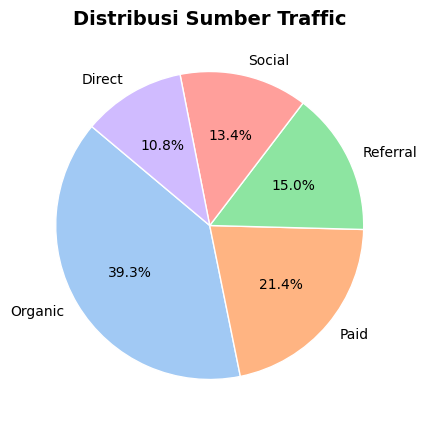

In [21]:
traffic_counts = df['Traffic Source'].value_counts()
colors = sns.color_palette("pastel", len(traffic_counts))

# buat Pie Chart
plt.figure(figsize=(8, 5))
plt.pie(traffic_counts, labels=traffic_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'})

plt.title("Distribusi Sumber Traffic", fontsize=14, fontweight='bold')
plt.show()

**Insight dari Diagram di Atas:**
1. **Organic (39.3%) Mendominasi**  
   - Traffic organik merupakan sumber traffic terbesar. Ini menunjukkan bahwa SEO (Search Engine Optimization) dan pencarian organik sangat efektif dalam mendatangkan pengguna.  

2. **Paid (21.4%) Sebagai Kontributor Besar**  
   - Iklan berbayar cukup signifikan dalam mendatangkan traffic, tetapi masih jauh di bawah organic. Jika ingin meningkatkan konversi lebih lanjut, perlu evaluasi iklan.  

3. **Referral (15.0%) dan Social (13.4%) Cukup Signifikan**  
   - Traffic dari situs dan media sosial menunjukkan peran yang lumayan. Mungkin ada beberapa situs atau postingan media sosial yang membantu mendatangkan pengunjung.  

4. **Direct (10.8%) Paling Rendah**  
   - Ini menunjukkan bahwa hanya sebagian kecil pengguna yang langsung mengetik URL situs. Bisa jadi branding belum cukup kuat untuk mendorong pengunjung langsung datang ke website tanpa melalui google pencarian atau referensi.  

**Tindakan yang Bisa Dilakukan:**
1. **Maksimalkan SEO untuk Organic Traffic**  
   - Pertahankan atau tingkatkan strategi SEO (konten berkualitas, backlink, optimasi keyword) agar sumber utama ini tetap kuat.  

2. **Optimasi Paid Campaign**  
   - Evaluasi efektivitas iklan berbayar: apakah biaya yang dikeluarkan sebanding dengan konversi yang dihasilkan?  

3. **Perkuat Strategi Media Sosial & Referral**  
   - Jika ingin meningkatkan dari Social dan Referral, bisa dilakukan kolaborasi dengan influencer, publikasi konten lebih menarik, serta bekerja sama dengan situs lain untuk mendapatkan lebih banyak backlink.  

4. **Tingkatkan Brand Awareness untuk Direct Traffic**  
   - Bisa melalui strategi seperti email marketing, event offline/online, atau memperkuat loyalitas pelanggan agar mereka lebih sering langsung mengunjungi situs.  

## Bar Chart Kinerja Traffic Source Berdasarkan Performance Score

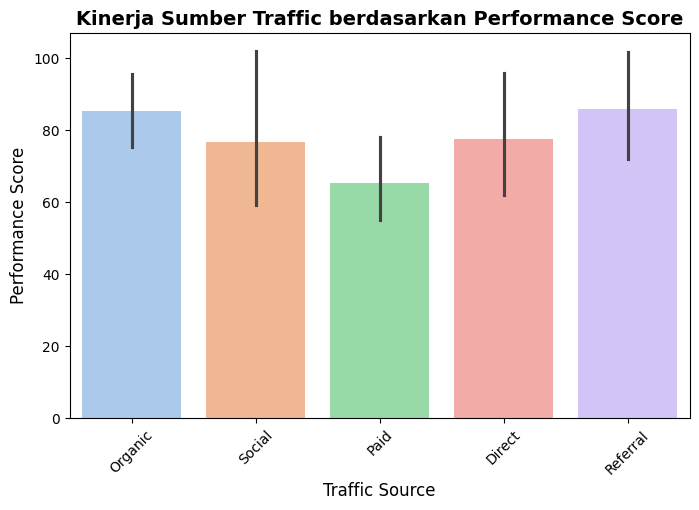

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Traffic Source", y="Traffic Source Performance Score", hue="Traffic Source", legend=False, palette="pastel")

# Judul dan label
plt.title("Kinerja Sumber Traffic berdasarkan Performance Score", fontsize=14, fontweight="bold")
plt.xlabel("Traffic Source", fontsize=12)
plt.ylabel("Performance Score", fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Insight dari Visualisasi:**  
1. **Traffic Source dengan *Performance Score* Tertinggi**  
   - Organic dan Referral memiliki Performance Score tertinggi di antara semua traffic source.  
   - Ini menunjukkan bahwa pengunjung dari pencarian organik (lewat mesin pencarian) dan referral lebih berkualitas dalam hal engagement dan conversion.

2. **Social dan Direct Lumayan Stabil**  
   - Social dan Direct memiliki Performance Score yang hampir seimbang, meskipun dengan variasi yang lebih besar.  
   - Ini menunjukkan bahwa efektivitas media sosial bisa bervariasi tergantung pada platform dan strategi yang digunakan.

3. **Paid Traffic Memiliki *Performance Score* Terendah**  
   - Traffic berbayar (Paid) memiliki skor performa yang paling rendah.  
   - Ini menunjukkan bahwa meskipun iklan bisa mendatangkan pengunjung, mereka mungkin tidak seefektif sumber lain dalam meningkatkan engagement dan conversion.

**Tindakan yang Bisa Diambil:**  
1. **Optimalkan SEO (Search Engine Optimization) untuk Meningkatkan Organic Traffic**  
   - Karena Organic memiliki performa tinggi, investasi dalam strategi SEO dapat meningkatkan jumlah lalu lintas berkualitas.  
   - Fokus pada *keyword* dengan niat tinggi dan konten yang relevan atau terkini.

2. **Perkuat Strategi Referral Marketing**  
   - Referral juga memiliki skor tinggi, jadi memperkuat strategi referral (misalnya melalui program afiliasi atau mitra kerja) dapat membantu meningkatkan efektivitas.

4. **Eksperimen dengan Konten Media Sosial**  
   - Social memiliki skor cukup baik, tetapi dengan variabilitas tinggi.  
   - Eksperimen dengan berbagai jenis konten (TikTok, infografis, dan cinematic) serta optimasi waktu posting dapat meningkatkan efektivitas.

## Bar Chart Kinerja Sumber Traffic berdasarkan Conversion Efficiency

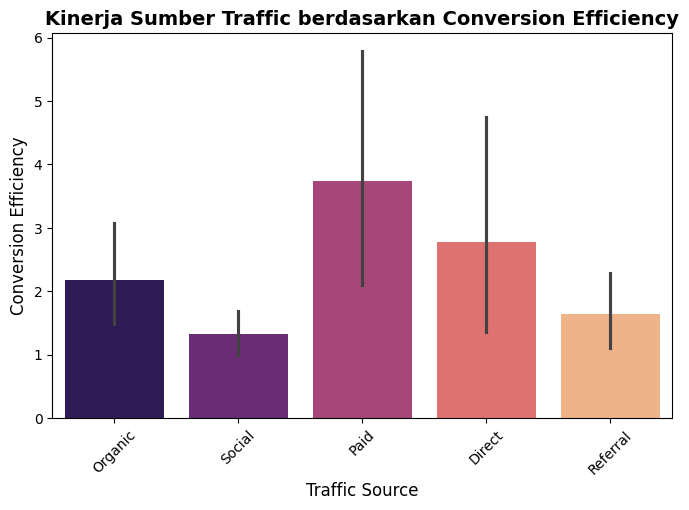

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Traffic Source", y="Conversion Efficiency", hue="Traffic Source", legend=False, palette="magma")

# Judul dan label
plt.title("Kinerja Sumber Traffic berdasarkan Conversion Efficiency", fontsize=14, fontweight="bold")
plt.xlabel("Traffic Source", fontsize=12)
plt.ylabel("Conversion Efficiency", fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Insight dari Visualisasi di atas:**
1. **Sumber Traffic dengan Efisiensi Konversi Tertinggi:**  
   - **Paid traffic** memiliki nilai *Conversion Efficiency* tertinggi, menunjukkan bahwa pengunjung dari iklan berbayar cenderung menghasilkan konversi dengan lebih sedikit usaha atau sumber daya dibandingkan yang lain.  
   - **Direct traffic** juga memiliki efisiensi tinggi, yang berarti pengunjung yang langsung mengakses situs (tanpa perantara) cenderung lebih berniat melakukan konversi.

2. **Sumber dengan Efisiensi Rendah:**  
   - **Social** dan **Referral** memiliki *Conversion Efficiency* terendah. Ini menunjukkan bahwa meskipun traffic dari media sosial atau situs referensi ada, mereka mungkin kurang efektif dalam menghasilkan konversi.

3. **Variasi dalam Efisiensi:**  
   - Paid dan Direct memiliki variasi yang lebih besar (ditunjukkan oleh garis error bar yang panjang), yang berarti ada ketidakkonsistenan dalam performa mereka.  
   - Organic dan Social lebih stabil tetapi dengan nilai efisiensi lebih rendah.

**Tindakan yang Dapat Diambil:**
1. **Optimalkan Paid Traffic**  

2. **Tingkatkan Efektivitas Social & Referral Traffic:**  
  - Analisis apakah konten yang dipromosikan di media sosial sesuai dengan audiens yang ditargetkan.  
  - Perbaiki strategi *landing page* untuk pengunjung dari media sosial agar lebih sesuai dengan ekspektasi mereka.  
  - Coba strategi referral marketing seperti insentif atau program loyalty agar referral traffic lebih tertarik untuk berkonversi.  

3. **Optimasi Direct Traffic:**  
  - Jika direct traffic tinggi dan efisien, pastikan pengalaman pengguna di situs tetap optimal.  
  - Cek apakah ada faktor eksternal (brand awareness, offline marketing) yang mempengaruhi peningkatan direct traffic.

## Box Plot Distribusi Bounce Rate per Traffic Source

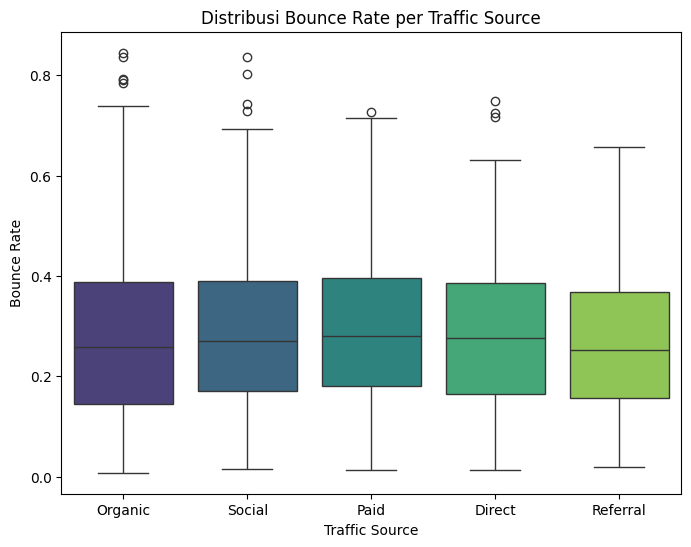

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Traffic Source", y="Bounce Rate", hue="Traffic Source", legend=False, palette="viridis")
plt.title("Distribusi Bounce Rate per Traffic Source")
plt.show()

**Insight dari Visualisasi:**
1. **Median Bounce Rate Konsisten di Semua Sumber Traffic**
   - Median bounce rate di semua sumber traffic (Organic, Social, Paid, Direct, Referral) berada di sekitar 0.25 - 0.30.
   - Ini menunjukkan bahwa tidak ada perbedaan signifikan dalam tingkat bouncing antar sumber traffic.

2. **Penyebaran Data Lumayan Mirip**
   - Semua box plot memiliki rentang interkuartil (IQR) yang mirip, menunjukkan bahwa variasi bounce rate antar sumber lalu lintas tidak jauh berbeda.
   - Maksimum bounce rate di semua kategori mendekati 0.8, sedangkan minimum hampir 0.

3. **Outlier dalam Bounce Rate**
   - Ada beberapa outlier (titik di atas), terutama pada Social, Paid, dan Direct traffic.
   - Ini menunjukkan bahwa ada beberapa sesi dengan bounce rate yang sangat tinggi.

**Tindakan yang Dapat Diambil:**
1. **Fokus pada Optimalisasi Landing Page (Laman Utama Situs)**
   - Karena semua traffic source memiliki median bounce rate yang mirip, optimasi landing page dapat membantu menurunkan bounce rate secara keseluruhan.

3. **Evaluasi Kinerja Paid Traffic**
   - Paid traffic memiliki jumlah outlier yang cukup tinggi.
   - Pastikan apakah iklan menargetkan audiens yang tepat, karena bounce rate tinggi bisa menunjukkan ketidaksesuaian antara ekspektasi pengguna dan halaman yang mereka kunjungi.